# To Do




# The Harmonic Oscillator

<font color='red'> include some preliminary stuff here on the harmonic oscillator</font>

## Time evolution
For this evolution, we will start by setting $m = 1$, $\omega = 1$, and $\hbar = 1$. 

As with the tunneling experiment with the wells and barriers, we will use the Suzuki-Trotter formula and approxmiate the time evolution. Again, let $H = K + V$, where $ K= p^2/2$ and $V = x^2/2$. Thus, we have:

$$ e^{iH\Delta t} = e^{i(K+V)\Delta t} \approx e^{iK \Delta t}e^{iV \Delta t}$$


## Discretization

Position and momentum are continuous. In order to simulate the dynamics, we discretize the momentum and position of the harmonic oscillator. 

<img src="QHO Images/position op.png">

<font color='red'> I don't quite understand how this operator is created.</font> 

## Basics

The Hamiltonian for the harmonic oscillator is given as:

$$ H = \frac{p^2}{2m} + \frac{1}{2}m\omega^2 $$

Where we can view the first time as the kinetic term and the second as the potential term. 

<font color='red'> Include some stuff on hermite polynomials, raising and lowering ops, etc.</font>

Note that, using our ladder operator formalism, we can rewrite our Hamiltonian as:

$$ H = \hbar \omega (a^\dagger a + \frac{1}{2}) $$

Our eigenfunctions take the form of of Hermite Polynomials, taking the form $H_n(x)$. However, a simpler notation is to represent the eigenfunctions as kets: $| n \rangle$. 

Consider now the Fourier Transform of the hamiltonian. We can examine this by taking the Fourier Transform of the two ladder operators in the Hamiltonian. The transformation leads to the following:

$$ a^\dagger \rightarrow -i a^\dagger, a \rightarrow ia $$

These transformations simply rescale the product of operators, $a^\dagger a$ by a factor of $(-i)i$. This means that, while the eigenvalues will change, $| n \rangle$ are still the eigenvectors of the Fourier Transformed Hamiltonian. 


In [4]:
import numpy as np
import numpy.linalg as la
import math as m
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
#from qiskit_textbook.tools import random_state, array_to_latex # This import isn't working for me

import qiskit
print(qiskit.__qiskit_version__)

{'qiskit-terra': '0.14.2', 'qiskit-aer': '0.5.2', 'qiskit-ignis': '0.3.3', 'qiskit-ibmq-provider': '0.7.2', 'qiskit-aqua': '0.7.3', 'qiskit': '0.19.6'}


In [5]:
# These are all the same kinetic terms from 

delta_t = 1 / 10 

#I checked 2/10, 3/10, and 5/10
theta1_kinetic = -m.pi*m.pi*delta_t
theta2_kinetic = -m.pi*m.pi*delta_t/4
theta3_kinetic = m.pi*m.pi*delta_t

def F(qc):
    qc.h(1)
    qc.cu1(m.pi/2, 0, 1)
    qc.h(0)
    qc.barrier()
    return qc

def F_inv(qc):
    qc.h(0)
    qc.cu1(-m.pi/2, 0, 1)
    qc.h(1)
    qc.barrier()
    return qc    

def D(qc, theta1, theta2, theta3):
    qc.rz(theta1, 0)
    qc.rz(theta2, 1)
    qc.cu1(theta3, 1,0) # If you look at the drawing, the gate i being applied where theta_1 is, so the control
    # qubit is where theta_2 is being applied.
    qc.barrier()
    return qc
    


In [9]:
# Using Aden's notes, I will try a free particle simulation

#SHO constants for the potential
t1 = 100000000
t2 = 1/2
t3 = -100000000
delta_t = 1/5

# Initializing the circuit
qr = QuantumRegister(2) #the qubits needed
cr = ClassicalRegister(2) #for the measurement
qc = QuantumCircuit(qr, cr) #creating the quantum circuit

# qc.x(0)  # no need for any prep since we start in the center of the well i |00>

#kinetic term
F(qc)
D(qc, theta1_kinetic, theta2_kinetic, theta3_kinetic)
F_inv(qc)
qc.barrier()

#potential term
D(qc, t1*delta_t, -1*t2*delta_t, t3*delta_t)
qc.measure( qr , cr )

#kinetic term
F(qc)
D(qc, theta1_kinetic, theta2_kinetic, theta3_kinetic)
F_inv(qc)
qc.barrier()

#potential term
D(qc, t1*delta_t, -1*t2*delta_t, t3*delta_t)
qc.measure( qr , cr )
#kinetic term
F(qc)
D(qc, theta1_kinetic, theta2_kinetic, theta3_kinetic)
F_inv(qc)
qc.barrier()

#potential term
D(qc, t1*delta_t, -1*t2*delta_t, t3*delta_t)
qc.measure( qr , cr )
qc.draw()

┌───┐ ░ ┌──────────────┐           ░ ┌───┐              ░  ░ »
q2_0: ──────■─────┤ H ├─░─┤ RZ(-0.98696) ├─■─────────░─┤ H ├─■────────────░──░─»
      ┌───┐ │pi/2 └───┘ ░ ├──────────────┤ │0.98696  ░ └───┘ │-pi/2 ┌───┐ ░  ░ »
q2_1: ┤ H ├─■───────────░─┤ RZ(-0.24674) ├─■─────────░───────■──────┤ H ├─░──░─»
      └───┘             ░ └──────────────┘           ░              └───┘ ░  ░ »
c2_0: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
c2_1: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
«      ┌───────────┐         ░ ┌─┐               ┌───┐ ░ ┌──────────────┐»
«q2_0: ┤ RZ(-pi/0) ├─■───────░─┤M├─────────■─────┤ H ├─░─┤ RZ(-0.98696) ├»
«      └┬──────────┤ │-pi/0  ░ └╥┘┌─┐┌───┐ │pi/2 └───┘ ░ ├──────────────┤»
«q2_1: ─┤ RZ(-0.1) ├─■───────░──╫─┤M├┤ H ├─■───────────░─┤ RZ(-0.24674) ├»
«       └──────────┘         ░  ║ └╥┘└───┘             ░ └──────────────┘»
«c2_0: ═════════════════════════╩══╬═════════════════════════════════════»
«                                  ║                                     »
«c2_1: ════════════════════════════╩═════════════════════════════════════»
«                                                                        »
«                 ░ ┌───┐              ░  ░ ┌───────────┐         ░ ┌─┐        »
«q2_0: ─■─────────░─┤ H ├─■────────────░──░─┤ RZ(-pi/0) ├─■───────░─┤M├────────»
«       │0.98696  ░ └───┘ │-pi/2 ┌───┐ ░  ░ └┬──────────┤ │-pi/0  ░ └╥┘┌─┐┌───┐»
«q2_1: ─■─────────░───────■──────┤ H ├─░──░──┤ RZ(-0.1) ├─■───────░──╫─┤M├┤ H ├»
«                 ░              └───┘ ░  ░  └──────────┘         ░  ║ └╥┘└───┘»
«c2_0: ══════════════════════════════════════════════════════════════╩══╬══════»
«                                                                       ║      »
«c2_1: ═════════════════════════════════════════════════════════════════╩══════»
«                                                                              »
«             ┌───┐ ░ ┌──────────────┐           ░ ┌───┐              ░  ░ »
«q2_0: ─■─────┤ H ├─░─┤ RZ(-0.98696) ├─■─────────░─┤ H ├─■────────────░──░─»
«       │pi/2 └───┘ ░ ├──────────────┤ │0.98696  ░ └───┘ │-pi/2 ┌───┐ ░  ░ »
«q2_1: ─■───────────░─┤ RZ(-0.24674) ├─■─────────░───────■──────┤ H ├─░──░─»
«                   ░ └──────────────┘           ░              └───┘ ░  ░ »
«c2_0: ════════════════════════════════════════════════════════════════════»
«                                                                          »
«c2_1: ════════════════════════════════════════════════════════════════════»
«                                                                          »
«      ┌───────────┐         ░ ┌─┐   
«q2_0: ┤ RZ(-pi/0) ├─■───────░─┤M├───
«      └┬──────────┤ │-pi/0  ░ └╥┘┌─┐
«q2_1: ─┤ RZ(-0.1) ├─■───────░──╫─┤M├
«       └──────────┘         ░  ║ └╥┘
«c2_0: ═════════════════════════╩══╬═
«                                  ║ 
«c2_1: ════════════════════════════╩═
«

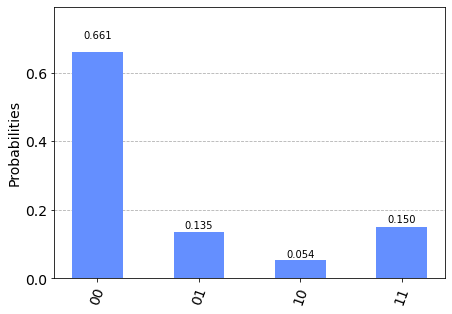

In [10]:

backend = BasicAer.get_backend('qasm_simulator') #'statevector_simulator' doesn't seem to return the right result
counts = execute(qc, backend, shots=1024).result().get_counts()

plot_histogram(counts)

In [31]:
# We will now try this using a potential

def V(qc, v_0, delta_t):
    qc.rz(2*v_0*delta_t, 0) # check to make sure you're applying this to the correct place
    qc.barrier()
    return qc

def apply_evo(qc, v_0, delta_t, theta1, theta2, theta3):
    F(qc)
    D(qc, theta1, theta2, theta3)
    F_inv(qc)
    V(qc, v_0, delta_t)
    qc.barrier()
    return qc

def Vnew(qc, v_0, delta_t):
    D(qc, 0, 0, 0)
    qc.barrier
    return qc

delta_t = 1 / 5
theta1 = -m.pi*m.pi*delta_t
theta2 = -m.pi*m.pi*delta_t/4
theta3 = m.pi*m.pi*delta_t
time_steps = 10
v_0 = -100.



# Initializing the circuit
qr = QuantumRegister(2) #the qubits needed
cr = ClassicalRegister(2) #for the measurement
qc2 = QuantumCircuit(qr, cr) #creating the quantum circuit
qc2.x(0)

qc2.barrier()
i = 0
while i < time_steps:
    apply_evo(qc2, v_0, delta_t, theta1, theta2, theta3)
    i+=1
    
qc2.measure( qr , cr )

print(qc2.draw())

# NOTE::
#for v0 = 100. dt = 1/5, 10 steps, results look a bit funny

       ┌───┐ ░             ┌───┐ ░ ┌─────────────┐           ░ ┌───┐        »
q15_0: ┤ X ├─░───────■─────┤ H ├─░─┤ RZ(-1.9739) ├──■────────░─┤ H ├─■──────»
       └───┘ ░ ┌───┐ │pi/2 └───┘ ░ ├─────────────┴┐ │1.9739  ░ └───┘ │-pi/2 »
q15_1: ──────░─┤ H ├─■───────────░─┤ RZ(-0.49348) ├─■────────░───────■──────»
             ░ └───┘             ░ └──────────────┘          ░              »
c15_0: ═════════════════════════════════════════════════════════════════════»
                                                                            »
c15_1: ═════════════════════════════════════════════════════════════════════»
                                                                            »
«             ░ ┌─────────┐ ░  ░             ┌───┐ ░ ┌─────────────┐          »
«q15_0: ──────░─┤ RZ(-40) ├─░──░───────■─────┤ H ├─░─┤ RZ(-1.9739) ├──■───────»
«       ┌───┐ ░ └─────────┘ ░  ░ ┌───┐ │pi/2 └───┘ ░ ├─────────────┴┐ │1.9739 »
«q15_1: ┤ H ├─░─────────────░──░─┤ H ├─■───────────░─┤ RZ(

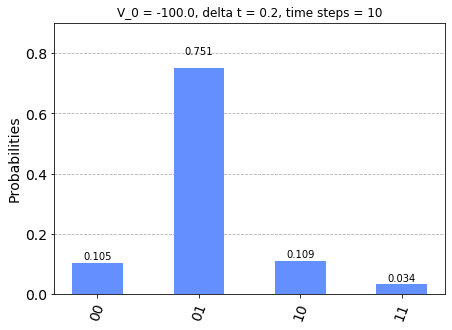

In [32]:
backend = BasicAer.get_backend('qasm_simulator') #'statevector_simulator' doesn't seem to return the right result
counts2 = execute(qc2, backend, shots=1024).result().get_counts()

plot_histogram(counts2, title = "V_0 = " + str(v_0) + ", delta t = " + str(delta_t) + ", time steps = " + str(time_steps))

# References 
 -1 https://arxiv.org/pdf/0709.1704.pdf
 
 -2 https://arxiv.org/pdf/1906.01436.pdf (driven SHO, no tunelling)
 
 -3 https://www.osti.gov/servlets/purl/1619265
 
 -4 https://www.researchgate.net/publication/334680969_Quantum_Simulation_of_Discretized_Harmonic_Oscillator_on_IBM_Quantum_Computer (Tunneling)
 
 -5 https://arxiv.org/pdf/1503.06319.pdf